# CS-401 Lab 4
## Arkaprabha Banerjee (201801408)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from statistics import NormalDist

In [2]:

df=pd.read_csv('sensex_stock.csv')
df1 = pd.read_csv('sensex_stock_future.csv')
df2 = pd.read_csv('sensex_option.csv')
df =  df.dropna()
df1 =  df1.dropna()
df2.dropna()
close_price=df['Close']
close_price_future = df1['Close']
option_price_actual = df2['Close']
arr =  close_price.tolist()
arr_future = close_price_future.tolist()
option_actual = option_price_actual.tolist()
option_actual.reverse()

# print(len(arr))
# print(len(arr_future))
# print(len(option_actual))


In [3]:

mean=0
std=0

for i in range(len(arr)-1):
    mean=mean+(arr[i+1]-arr[i])/arr[i]
mean=mean/(len(arr)-1)
# mean = mean*N

mu_i=[np.log(arr[i+1]/arr[i]) for i in range(0,len(arr)-1)]
mu_bar=np.mean(mu_i)

for i in range(1,len(mu_i)):
    std=std+(mu_bar-mu_i[i])*(mu_bar-mu_i[i])

std=std/(len(arr)-2)
std=np.sqrt(std)
std=std/np.sqrt(1/365)

print("Mean Value is : "+ str(mean))
print("Sigma is : " + str(std))

Mean Value is : 0.00045303059302247644
Sigma is : 0.15890178339650599


* Historical data of SENSEX for about 2 years has been taken to calculate mean and variance. As a preliminary test, the same mean and sigma has been used to generate the same Historical data (via GBM) as can be seen below.

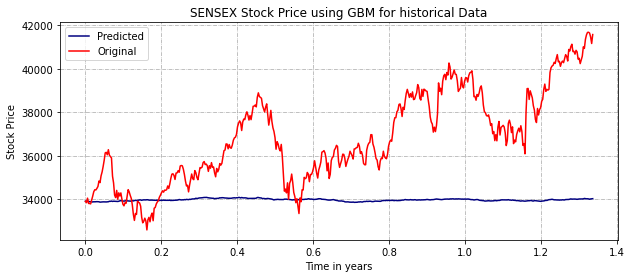

In [4]:
t=len(arr)/365
N=365
r = 7.319 / 100
np.random.seed(22)
x_axis=np.linspace(0,t,int(t*N))
x_axis1=np.linspace(0,t,len(arr))

s0=arr[0]
mu=mean
sigma=std
s=np.zeros(int(t*N))
runs=1000
for j in range(runs):
    ans=np.zeros(int(t*N))
    a=np.random.normal(0,1,int(t*N))

    for i in range(1,int(t*N)):
        ans[i]=ans[i-1]+a[i-1]
    for i in range(0,int(t*N)):
        ans[i]=ans[i]/np.sqrt(N)
    for i in range(int(t*N)):
        s[i]=s[i]+s0*math.exp((mu-sigma*sigma/2)*x_axis[i] + sigma*ans[i])
s = s/runs
plt.figure(figsize=(10,4))
plt.plot(x_axis,s,color='navy')
plt.plot(x_axis1,arr,color='red')
plt.legend(['Predicted','Original'])
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8) 
plt.xlabel('Time in years')
plt.ylabel('Stock Price')
plt.title('SENSEX Stock Price using GBM for historical Data')
plt.show()

* Now we predict the future stock price ever since the option has been written and compare it with the actual stock price

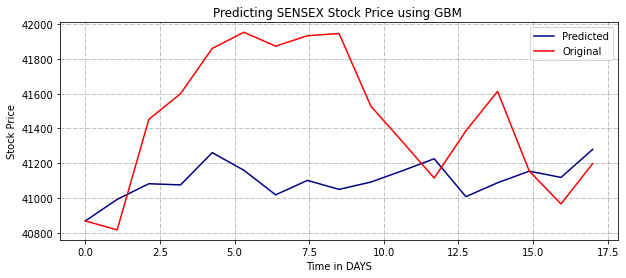

In [5]:
# Q3B
t=len(arr_future)/365
N=365
r = 7.319 / 100
np.random.seed(22)
x_axis=np.linspace(0,t,int(t*N))
x_axis1=np.linspace(0,t,len(arr_future))

s0=arr_future[0]
mu=mean
sigma=std
s=np.zeros(int(t*N))
runs=10
for j in range(runs):
    ans=np.zeros(int(t*N))
    a=np.random.normal(0,1,int(t*N))

    for i in range(1,int(t*N)):
        ans[i]=ans[i-1]+a[i-1]
    for i in range(0,int(t*N)):
        ans[i]=ans[i]/np.sqrt(N)
    for i in range(int(t*N)):
        s[i]=s[i]+s0*math.exp((mu-sigma*sigma/2)*x_axis[i] + sigma*ans[i])
s = s/runs
plt.figure(figsize=(10,4))
plt.plot(N*x_axis,s,color='navy')
plt.plot(N*x_axis1,arr_future,color='red')
plt.legend(['Predicted','Original'])
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8) 
plt.xlabel('Time in DAYS')
plt.ylabel('Stock Price')
plt.title('Predicting SENSEX Stock Price using GBM ')
plt.show()

In [6]:
# Monte- Carlo
t=len(s)/365
N=365
r = 6.59 / 100
np.random.seed(22)
x_axis=np.linspace(0,t,int(t*N))
x_axis1=np.linspace(0,t,len(option_actual)-1)
option_price_pred = np.zeros(len(s))
st = s[-1]
K = 40500
for i in range(len(x_axis)):
    option_price_pred[i] = math.exp(-r * (t-x_axis[i]))*max(st - K,0)


In [7]:
# BSM 
t=len(s)/365
N=365
r = 6.59 / 100
np.random.seed(22)
x_axis=np.linspace(0,t,int(t*N))
x_axis1=np.linspace(0,t,len(option_actual)-1)
option_price_pred1 = np.zeros(len(s))
K = 40500


for i in range(len(x_axis)):
    if(x_axis[i]!=t):
        d_plus = (np.log(s[i]/K) + (r + 0.5*sigma**2)*(t-x_axis[i]))/(sigma*(t-x_axis[i]))
    else:
        d_plus=float('inf')
    d_minus = d_plus - sigma*np.sqrt(t-x_axis[i])
    
    option_price_pred1[i] = s[i]*NormalDist(mu=0, sigma=1).cdf(d_plus) - K*math.exp(-r*(t-x_axis[i])) * NormalDist(mu=0, sigma=1).cdf(d_minus)


* We initially predict the final option price upon expiry by only considering the intial stock price (S0) which has been predicted above.

In [8]:
print("Actual Option Price is : "+str(option_actual[-2]))
print("Final Option Price Prediction via Monte-Carlo GBM is : "+str(option_price_pred[0]))
print("Final Option Price Prediction via Black-Scholes Formula is : "+str(option_price_pred1[0]))


Actual Option Price is : 490.25
Final Option Price Prediction via Monte-Carlo GBM is : 777.9747306293109
Final Option Price Prediction via Black-Scholes Formula is : 601.8885588800549


* Finally we use the Monte-Carlo Model (Via Geometric Brownian Motion) and the Black Scholes formula to predict the option price.
* The prediction of the price depends on how far we are from the expiry of the option and hence we obtain 2 plots. In this case the option expires in 18 days since it has been written.
* We finally compare the actual option price at the end of the expiry period and our final predictions via our models

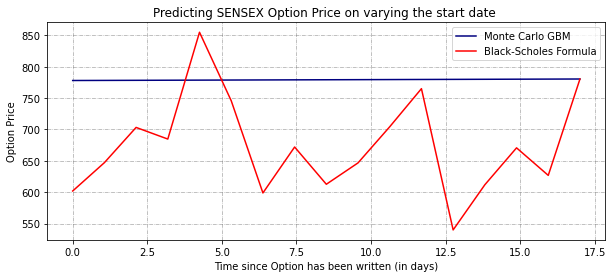

In [9]:

new_x_axis = (N*x_axis) 
plt.figure(figsize=(10,4))
plt.plot(new_x_axis,option_price_pred,color='navy')
plt.plot(new_x_axis,option_price_pred1,color='red')
# plt.plot(x_axis1,option_actual[0:-1],color='green')
plt.legend(['Monte Carlo GBM','Black-Scholes Formula'])
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8) 
plt.xlabel('Time since Option has been written (in days)')
plt.ylabel('Option Price')
plt.title('Predicting SENSEX Option Price on varying the start date ')
plt.show()


In [10]:
option_price_pred

array([777.97473063, 778.12398554, 778.27326909, 778.42258128,
       778.57192211, 778.7212916 , 778.87068974, 779.02011654,
       779.16957201, 779.31905616, 779.46856898, 779.61811049,
       779.76768068, 779.91727958, 780.06690717, 780.21656347,
       780.36624848])

In [11]:
s

array([40869.46875   , 40992.99979741, 41082.89866209, 41076.15557989,
       41261.49892172, 41159.89298176, 41019.16733262, 41102.02036798,
       41050.46018492, 41092.34801292, 41157.68105502, 41226.14606689,
       41008.81076861, 41088.54899073, 41155.12272976, 41119.01930736,
       41280.36624848])